In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [4]:
df = pd.read_csv("./data/상가(상권)정보_의료기관_201909.csv", low_memory=False)

In [5]:
df_nowon = df[df["시군구명"] == "노원구"].copy()
# df_nowon.head(1)

In [6]:
df_medical = df_nowon[df_nowon["상권업종중분류명"] == "병원"]
# df_medical.head(1)

In [7]:
df_medical["상권업종소분류명"].value_counts()

# 노인과 관련없는 소아과, 산부인과, 피부과 제외
df_medical = df_medical[df_medical["상권업종소분류명"] != "소아과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "산부인과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "피부과"]

# 추가적인 전처리를 위해 정형/성형외과, 기타병원 제외
df_medical = df_medical[df_medical["상권업종소분류명"] != "정형/성형외과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "기타병원"]

# df_medical["상권업종소분류명"].value_counts()
df_medical["행정동명"].value_counts()

상계6.7동    80
공릉1동      32
중계2.3동    32
상계2동      29
월계3동      23
상계1동      23
월계1동      23
중계4동      20
상계8동      17
중계본동      17
공릉2동      15
중계1동      13
하계1동      13
상계9동      13
월계2동      12
상계3.4동    11
하계2동      10
상계5동       7
상계10동      5
Name: 행정동명, dtype: int64

In [8]:
df_some = df_nowon[df_nowon["상권업종중분류명"] == "병원"]

df_beauty = df_some[df_some["상권업종소분류명"] == "정형/성형외과"]
df_etc = df_some[df_some["상권업종소분류명"] == "기타병원"]

In [9]:
# 성형외과 제거
df_beauty["상호명"].value_counts()
beauty = df_beauty.drop(df_beauty.index[[0, 7, 8, 9, 13, 14]])
beauty["행정동명"].value_counts()
# beauty["상호명"].value_counts()

중계본동      2
중계1동      2
상계6.7동    2
상계2동      1
중계2.3동    1
공릉1동      1
중계4동      1
상계1동      1
Name: 행정동명, dtype: int64

In [10]:
# 기타병원 중 정신과, 미용치료 병원, 아동 병원 제외
df_etc["상호명"].value_counts()
etc = df_etc.drop(df_etc.index[[3, 4, 9, 11, 15, 16, 18, 21, 31, 38, 40, 41, 44]])
etc["행정동명"].value_counts()

# etc["상호명"].value_counts()

상계6.7동    8
상계8동      4
상계3.4동    3
중계2.3동    3
공릉1동      3
월계2동      2
상계5동      2
중계본동      2
상계2동      2
월계1동      1
월계3동      1
중계1동      1
Name: 행정동명, dtype: int64

In [36]:
# 최종
df = pd.read_csv("./data/hospital.csv", low_memory=False)
df.set_index("행정동", inplace=True)
df

,병원
행정동,
상계6.7동,90
중계2.3동,36
공릉1동,35
상계2동,32
상계1동,24
월계3동,24
월계1동,24
중계4동,21
상계8동,21


<AxesSubplot:ylabel='행정동'>

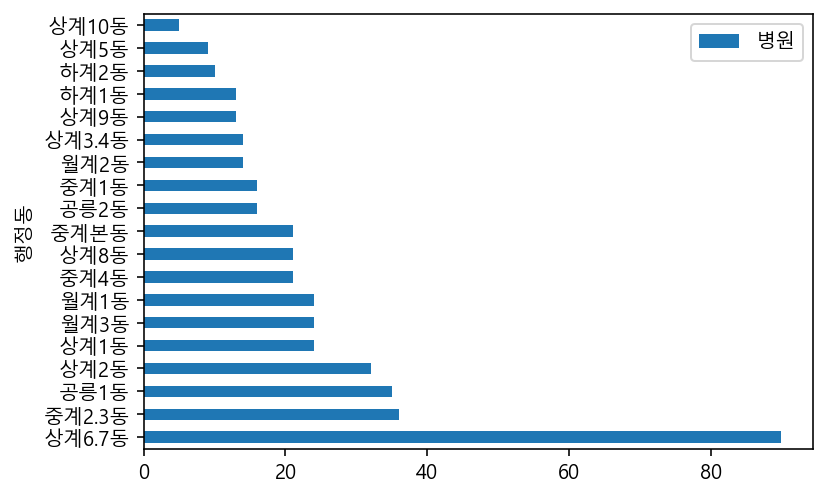

In [37]:
# 시각화
df.plot.barh()